In [2]:
# Data manipulation imports
import pandas as pd

# Plotting imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
gov = pd.read_csv('gov.csv')
gov.head()

,country,population,area_square_km,density_square_km,average_years_of_school,auto_demo_polity,gdp_per_capita,happiness_index,freedom_index,less_corruption_index,life_expectancy_years,inequality_gini,median_household_income_dollars,median_per_capita_income_dollars,median_individual_income_dollars
0,China,1444216.107,9706961,148.7815,2.77,-7.0,12009.4430,5.140,0.51697,0.02781,75.928,38.5,6180.0,1786.0,10410.0
1,India,1393409.038,3287590,423.8391,1.24,9.0,5722.5186,4.565,0.39786,0.08492,68.607,35.7,3168.0,616.0,2130.0
2,United States,332915.073,9372610,35.5200,10.61,10.0,53533.2810,7.119,0.54604,0.15890,78.910,41.1,43585.0,15480.0,65760.0
3,Indonesia,276361.783,1904569,145.1046,2.26,9.0,9781.2070,5.399,0.46611,0.00000,70.768,37.8,2199.0,541.0,4050.0
4,Pakistan,225199.937,881912,255.3542,1.31,7.0,4815.9243,5.194,0.12102,0.10464,66.577,33.5,4060.0,480.0,1530.0


## EDA
Look for trends in the data before modeling - ****please note that corruption is measured as it pertains to happiness, so the higher the corruption value is the _less_ corrupt the country is because citizens rate happiness higher (per index)****

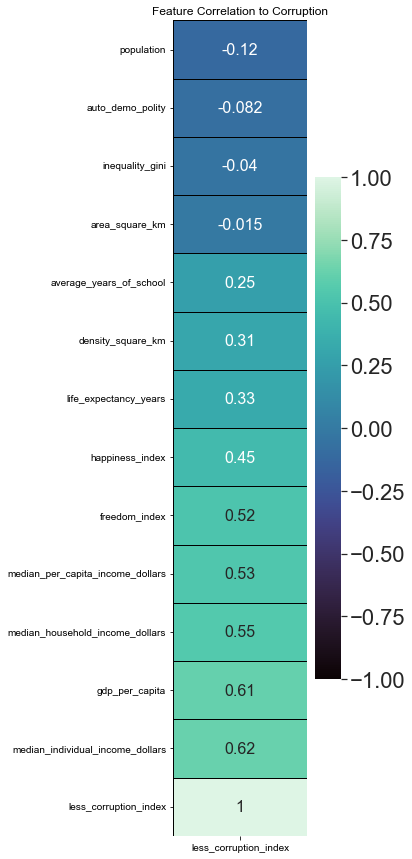

In [4]:
plt.figure(figsize = (3, 15))

ax = plt.axes()
ax.set_title('Feature Correlation to Corruption')
corr = gov.corr()[['less_corruption_index']]
sns.set(font_scale = 2)
sns.heatmap(corr.sort_values(by = 'less_corruption_index', ascending = True), 
            annot = True, cmap = 'mako', vmin = -1, vmax = 1, linecolor = 'black', 
            linewidth = 1, annot_kws = {'fontsize' : 16});

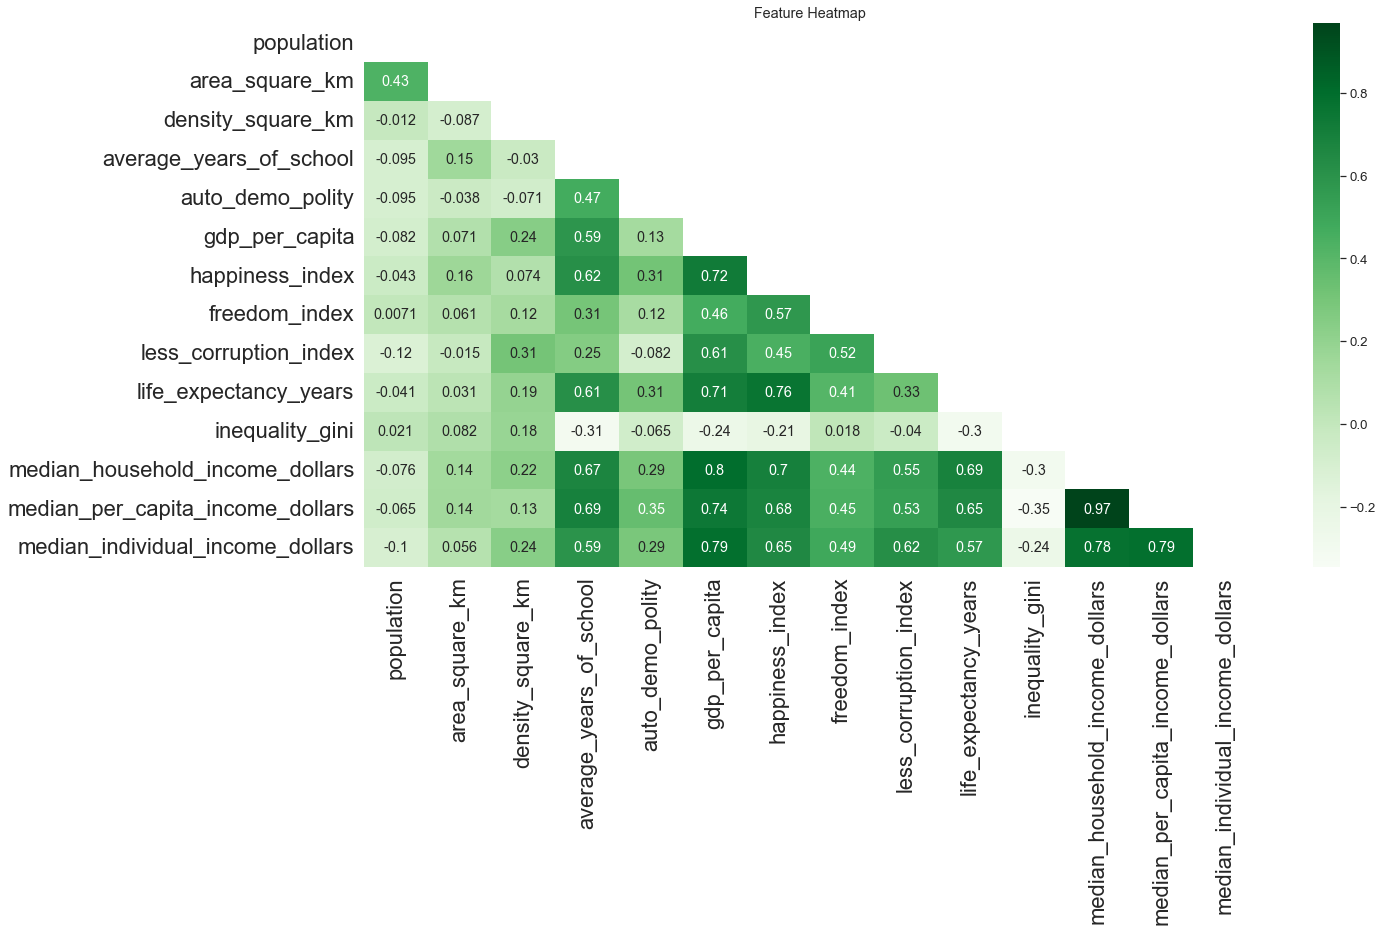

In [5]:
corr = gov.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
plt.figure(figsize = (20, 10))
ax = plt.axes()
sns.set(font_scale = 1.2)
ax.set_facecolor('white')
sns.heatmap(corr, annot = True, cmap = "Greens", mask = mask, ax = ax)
ax.set_title('Feature Heatmap');

Explore relationships of all variables to corruption:

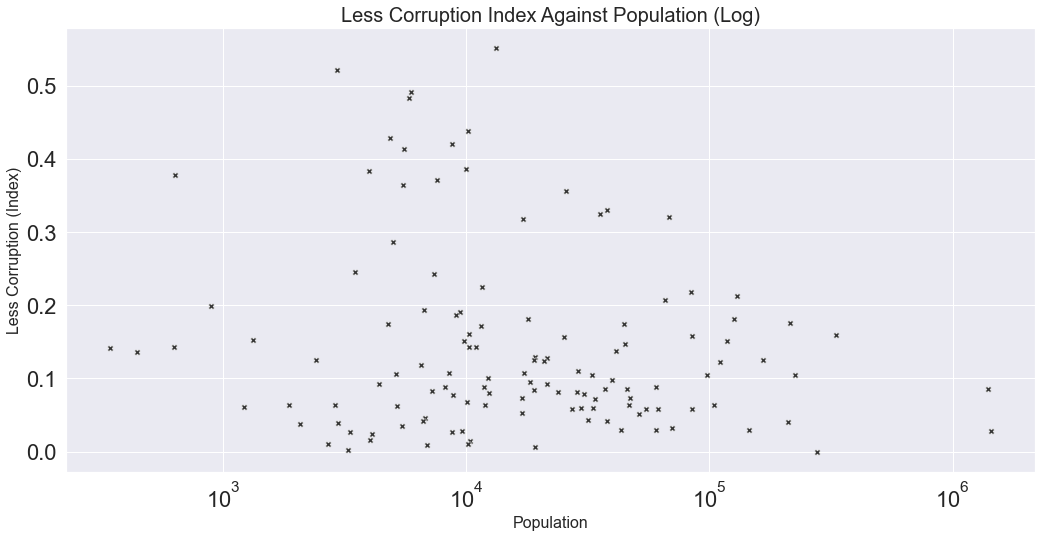

In [32]:
# Check population against less corruption
plt.figure(figsize = (15, 8))
g = sns.scatterplot(data = gov, x = 'population', y = 'less_corruption_index', color = '.2', marker = 'X') #credit to Seaborn documentation for X marker

plt.title('Less Corruption Index Against Population (Log)', size = 20)
plt.xlabel('Population', size = 16)
plt.ylabel('Less Corruption (Index)', size = 16)
g.set_xscale('log')

plt.tight_layout();

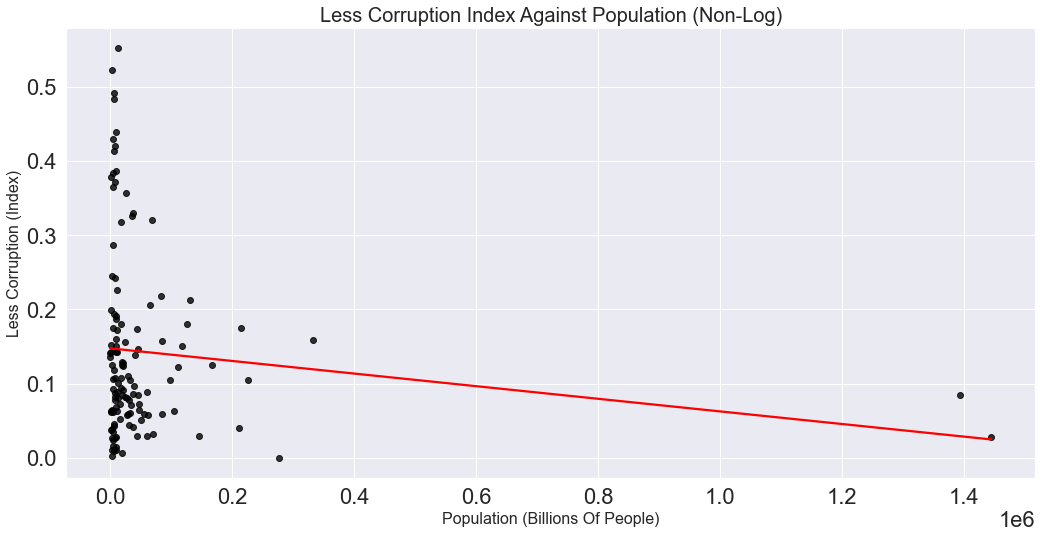

In [33]:
# Check population against less corruption
plt.figure(figsize = (15, 8))
# g = sns.scatterplot(data = gov, x = 'population', y = 'less_corruption_index', color = '.2', marker = 'X') #credit to Seaborn documentation for X marker

g = sns.regplot(data = gov, x = 'population', y = 'less_corruption_index', scatter_kws = {'color': 'black'},
            line_kws = {'color': 'red'}, ci = None)

plt.title('Less Corruption Index Against Population (Non-Log)', size = 20)
plt.xlabel('Population (Billions Of People)', size = 16)
plt.ylabel('Less Corruption (Index)', size = 16)

plt.tight_layout();

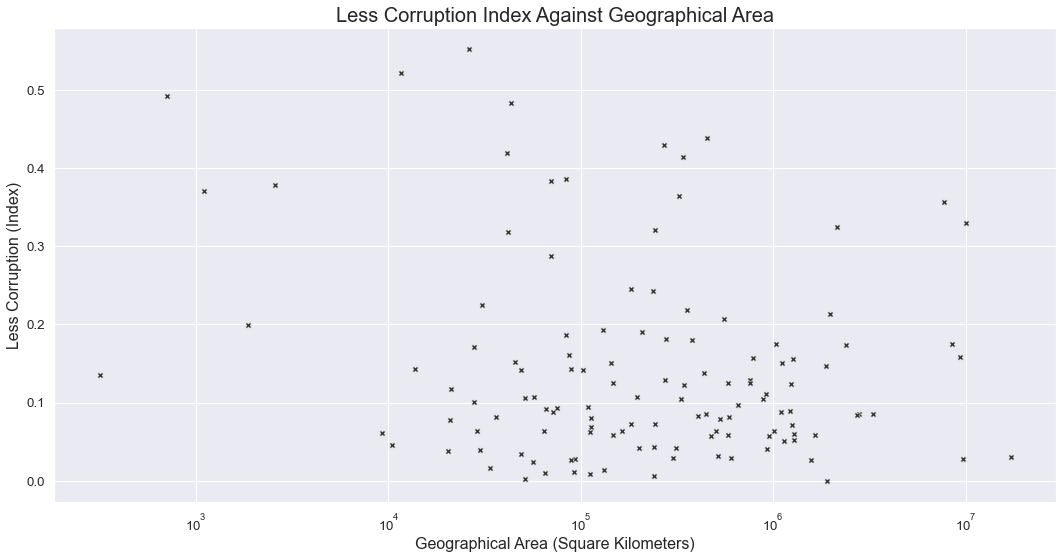

In [7]:
# Check area against less corruption
plt.figure(figsize = (15, 8))
g = sns.scatterplot(data = gov, x = 'area_square_km', y = 'less_corruption_index', color = '.2', marker = 'X')
plt.title('Less Corruption Index Against Geographical Area', size = 20)
plt.xlabel('Geographical Area (Square Kilometers)', size = 16)
plt.ylabel('Less Corruption (Index)', size = 16)
g.set_xscale('log')

plt.tight_layout();

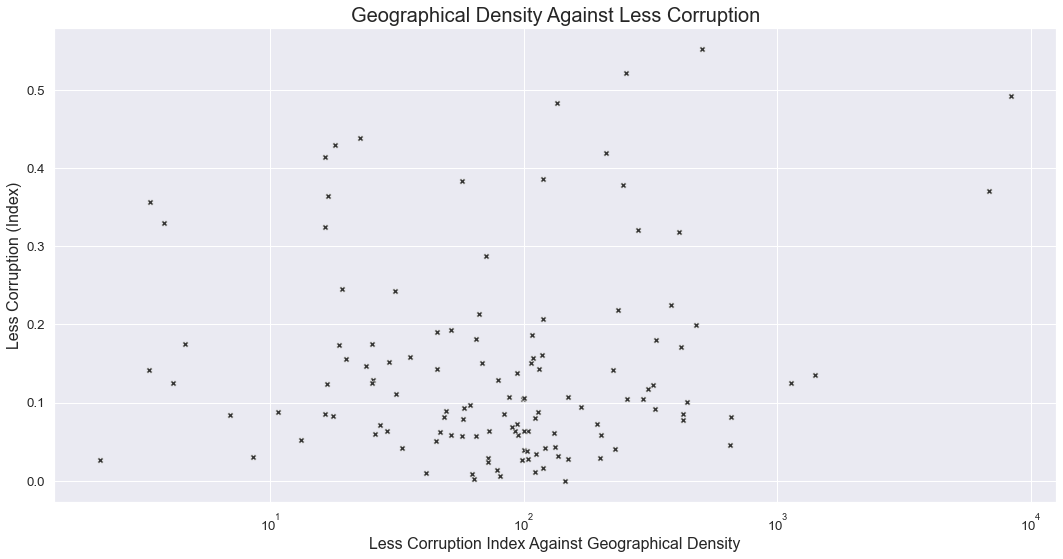

In [8]:
# Check density against less corruption
plt.figure(figsize = (15, 8))
g = sns.scatterplot(data = gov, x = 'density_square_km', y = 'less_corruption_index', color = '.2', marker = 'X')

plt.title('Geographical Density Against Less Corruption', size = 20)
plt.xlabel('Less Corruption Index Against Geographical Density', size = 16)
plt.ylabel('Less Corruption (Index)', size = 16)
g.set_xscale('log')

plt.tight_layout();

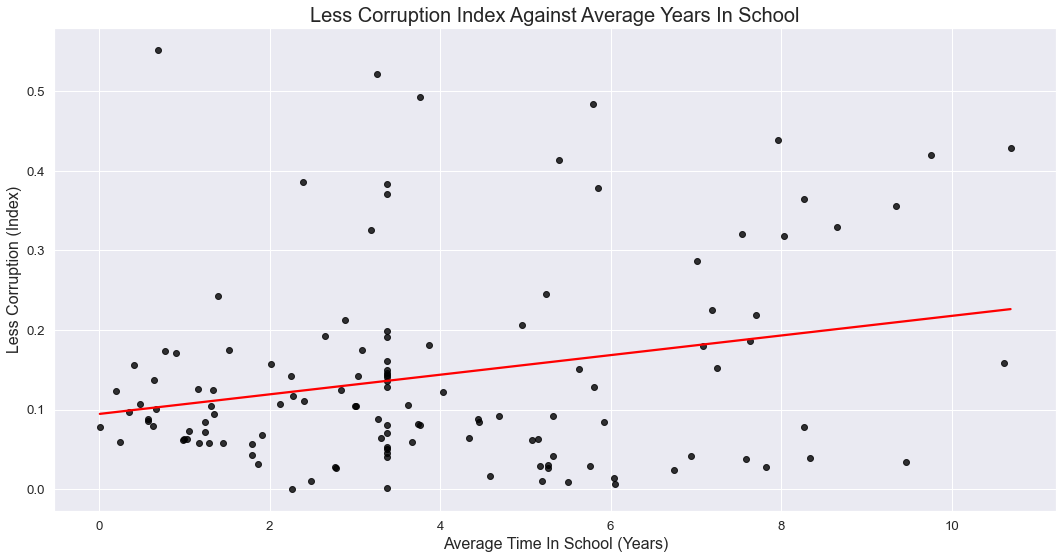

In [9]:
# Check average years in school against less corruption
plt.figure(figsize = (15, 8))
sns.regplot(data = gov, x = 'average_years_of_school', y = 'less_corruption_index', scatter_kws = {'color': 'black'},
            line_kws = {'color': 'red'}, ci = None)

plt.title('Less Corruption Index Against Average Years In School', size = 20)
plt.xlabel('Average Time In School (Years)', size = 16)
plt.ylabel('Less Corruption (Index)', size = 16)

plt.tight_layout();

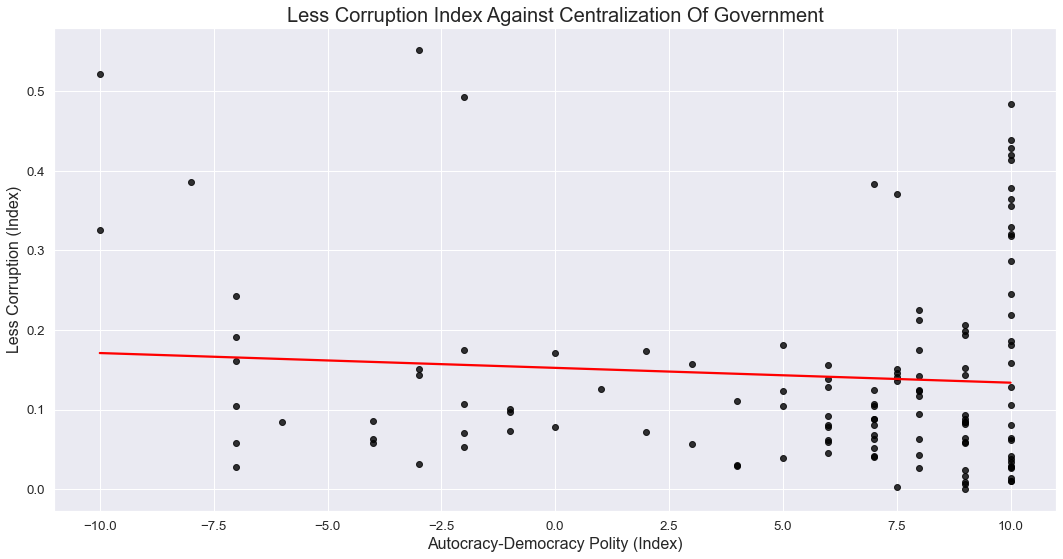

In [10]:
# Check centralization of government against less corruption
plt.figure(figsize = (15, 8))
sns.regplot(data = gov, x = 'auto_demo_polity', y = 'less_corruption_index', scatter_kws = {'color': 'black'},
            line_kws = {'color': 'red'}, ci = None)

plt.title('Less Corruption Index Against Centralization Of Government', size = 20)
plt.xlabel('Autocracy-Democracy Polity (Index)', size = 16)
plt.ylabel('Less Corruption (Index)', size = 16)

plt.tight_layout();

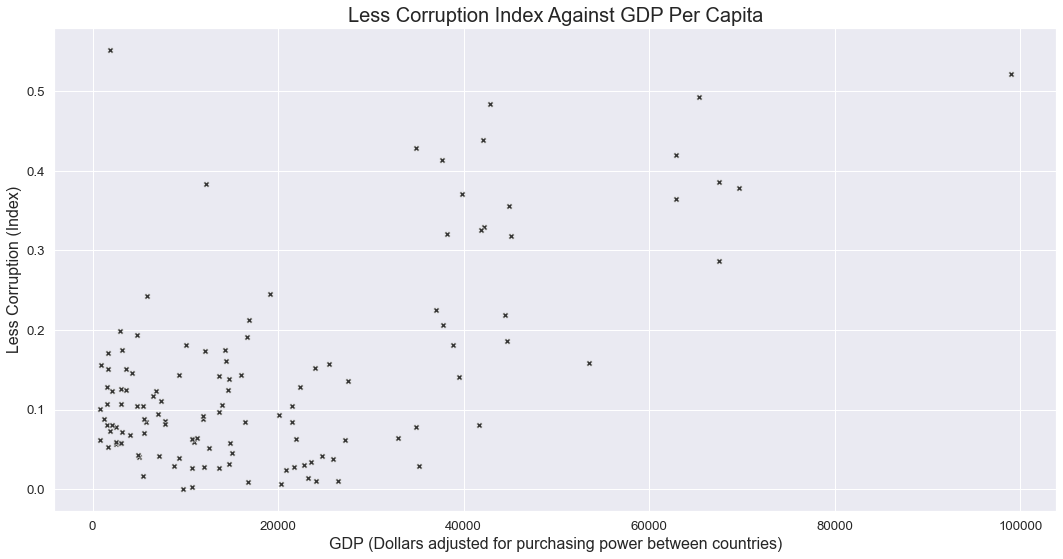

In [11]:
# Check gdp against less corruption
plt.figure(figsize = (15, 8))
g = sns.scatterplot(data = gov, x = 'gdp_per_capita', y = 'less_corruption_index', color = '.2', marker = 'X') 

plt.title('Less Corruption Index Against GDP Per Capita', size = 20)
plt.xlabel('GDP (Dollars adjusted for purchasing power between countries)', size = 16)
plt.ylabel('Less Corruption (Index)', size = 16)

plt.tight_layout();

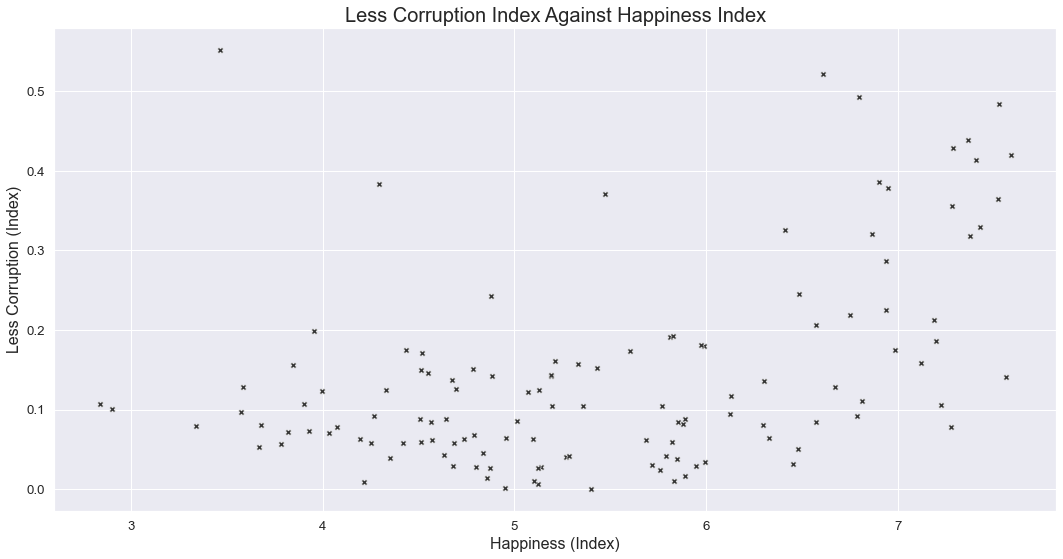

In [12]:
# Check happiness against less corruption
plt.figure(figsize = (15, 8))
g = sns.scatterplot(data = gov, x = 'happiness_index', y = 'less_corruption_index', color = '.2', marker = 'X') 

plt.title('Less Corruption Index Against Happiness Index', size = 20)
plt.xlabel('Happiness (Index)', size = 16)
plt.ylabel('Less Corruption (Index)', size = 16)

plt.tight_layout();

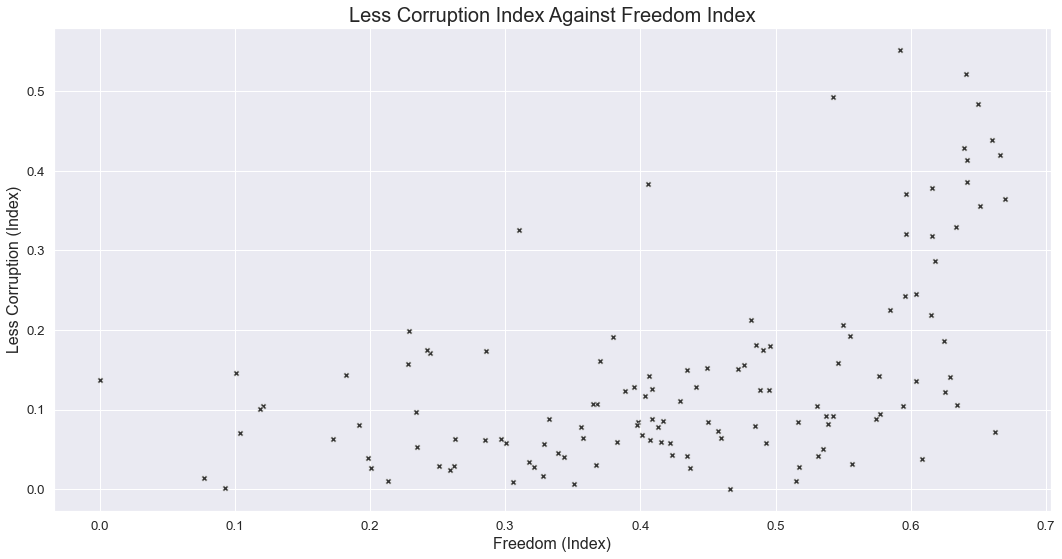

In [13]:
# Check freedom against less corruption
plt.figure(figsize = (15, 8))
g = sns.scatterplot(data = gov, x = 'freedom_index', y = 'less_corruption_index', color = '.2', marker = 'X') 

plt.title('Less Corruption Index Against Freedom Index', size = 20)
plt.xlabel('Freedom (Index)', size = 16)
plt.ylabel('Less Corruption (Index)', size = 16)

plt.tight_layout();

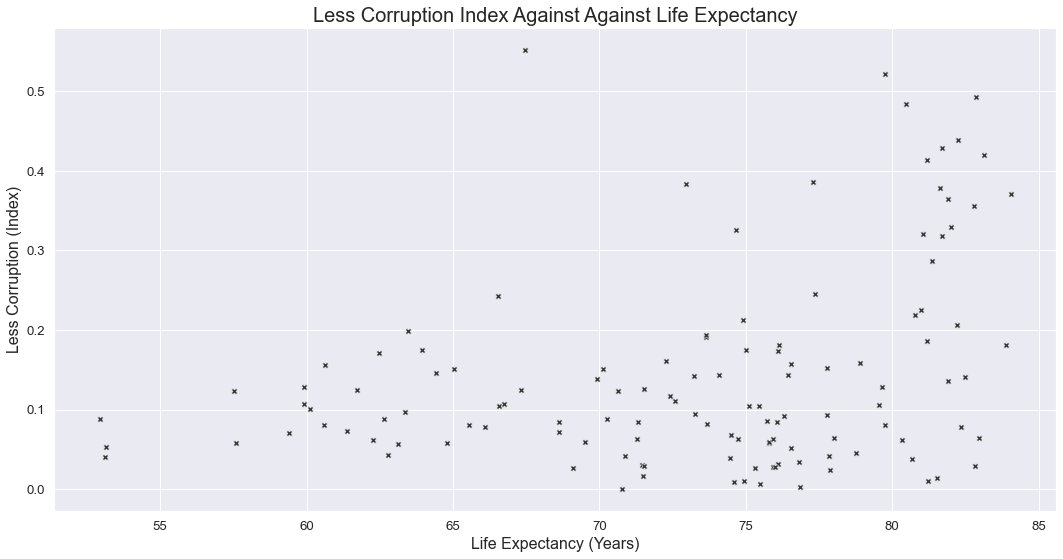

In [14]:
# Check life expectancy against less corruption
plt.figure(figsize = (15, 8))
g = sns.scatterplot(data = gov, x = 'life_expectancy_years', y = 'less_corruption_index', color = '.2', marker = 'X') #credit to Seaborn documenta

plt.title('Less Corruption Index Against Against Life Expectancy', size = 20)
plt.xlabel('Life Expectancy (Years)', size = 16)
plt.ylabel('Less Corruption (Index)', size = 16)

plt.tight_layout();

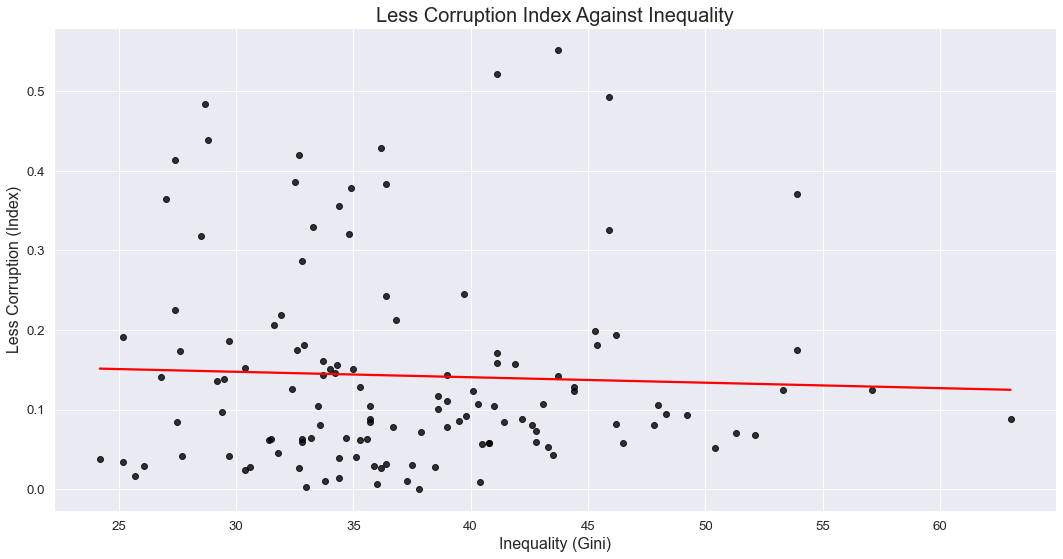

In [15]:
# Check inequality against less corruption
plt.figure(figsize = (15, 8))
sns.regplot(data = gov, x = 'inequality_gini', y = 'less_corruption_index', scatter_kws = {'color': 'black'},
            line_kws = {'color': 'red'}, ci = None)

plt.title('Less Corruption Index Against Inequality', size = 20)
plt.xlabel('Inequality (Gini)', size = 16)
plt.ylabel('Less Corruption (Index)', size = 16)

plt.tight_layout();

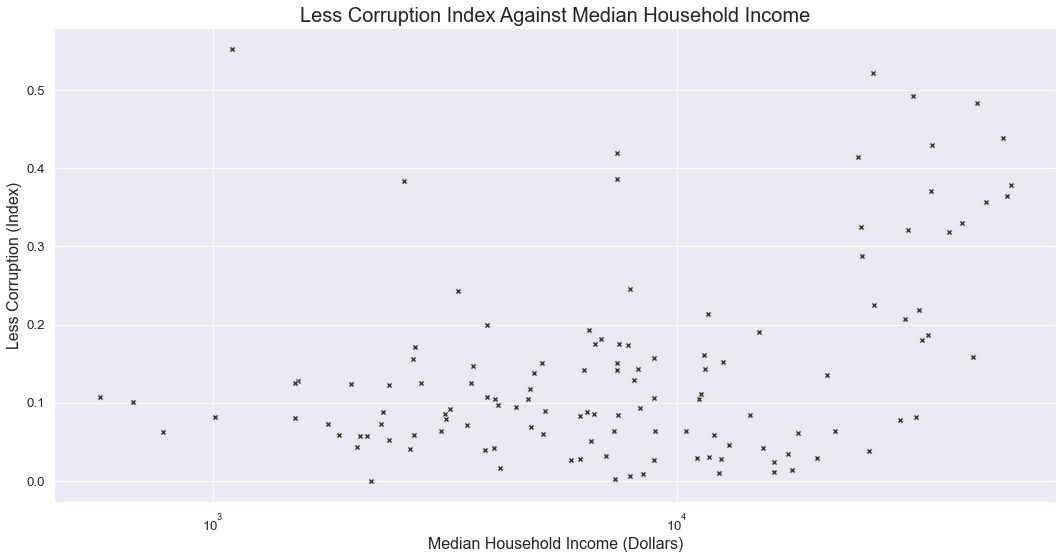

In [16]:
# Check median household income against less corruption
plt.figure(figsize = (15, 8))
g = sns.scatterplot(data = gov, x = 'median_household_income_dollars', y = 'less_corruption_index', color = '.2', marker = 'X') #credit to Seaborn documenta

plt.title('Less Corruption Index Against Median Household Income', size = 20)
plt.xlabel('Median Household Income (Dollars)', size = 16)
plt.ylabel('Less Corruption (Index)', size = 16)
g.set_xscale('log')

plt.tight_layout();

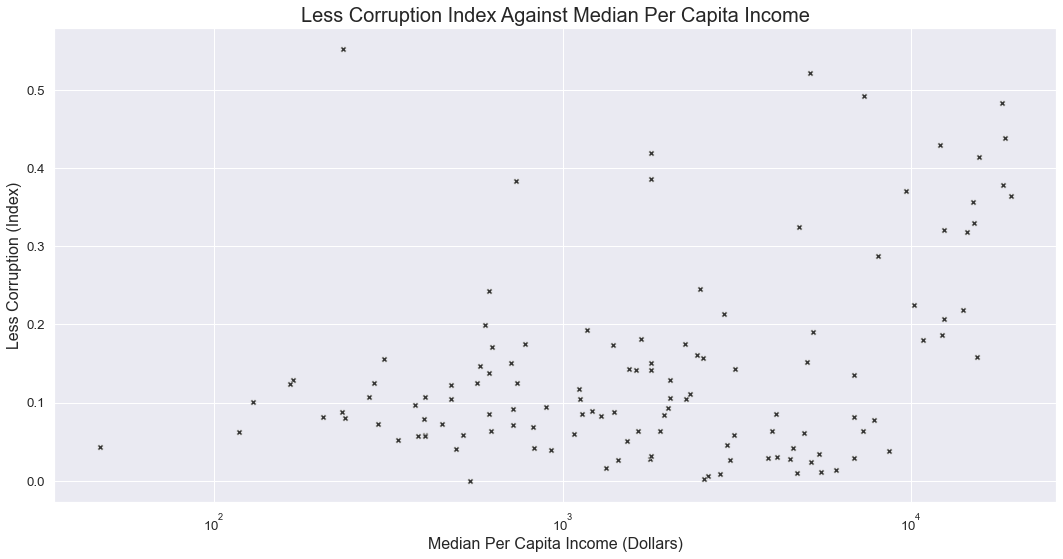

In [17]:
# Check median per capita income against less corruption
plt.figure(figsize = (15, 8))
g = sns.scatterplot(data = gov, x = 'median_per_capita_income_dollars', y = 'less_corruption_index', color = '.2', marker = 'X') #credit to Seaborn documenta

plt.title('Less Corruption Index Against Median Per Capita Income', size = 20)
plt.xlabel('Median Per Capita Income (Dollars)', size = 16)
plt.ylabel('Less Corruption (Index)', size = 16)
g.set_xscale('log')

plt.tight_layout();

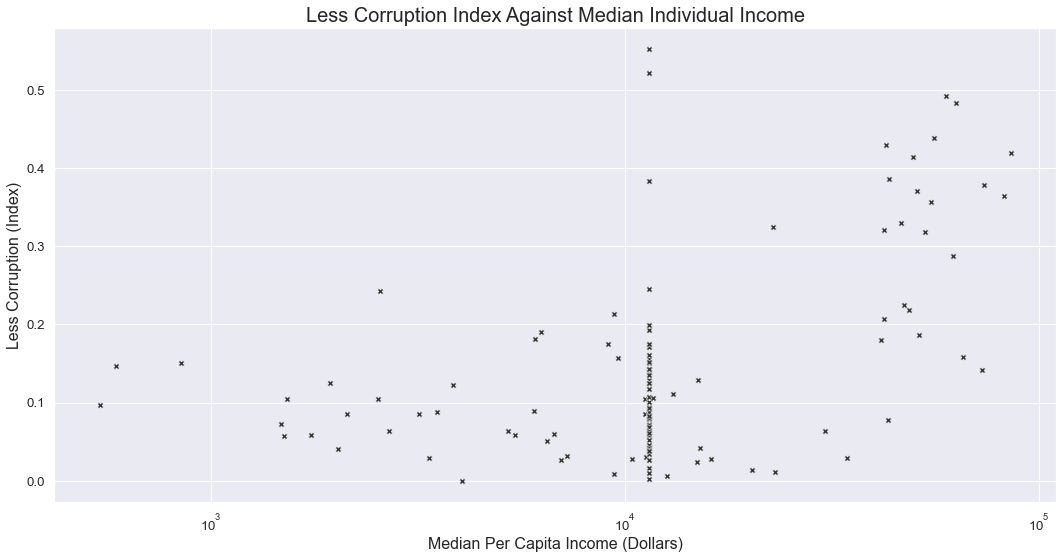

In [18]:
# Check median individual income dollars against less corruption
plt.figure(figsize = (15, 8))
g = sns.scatterplot(data = gov, x = 'median_individual_income_dollars', y = 'less_corruption_index', color = '.2', marker = 'X') #credit to Seaborn documenta

plt.title('Less Corruption Index Against Median Individual Income', size = 20)
plt.xlabel('Median Per Capita Income (Dollars)', size = 16)
plt.ylabel('Less Corruption (Index)', size = 16)
g.set_xscale('log')

plt.tight_layout();

Check some correlations against happiness:

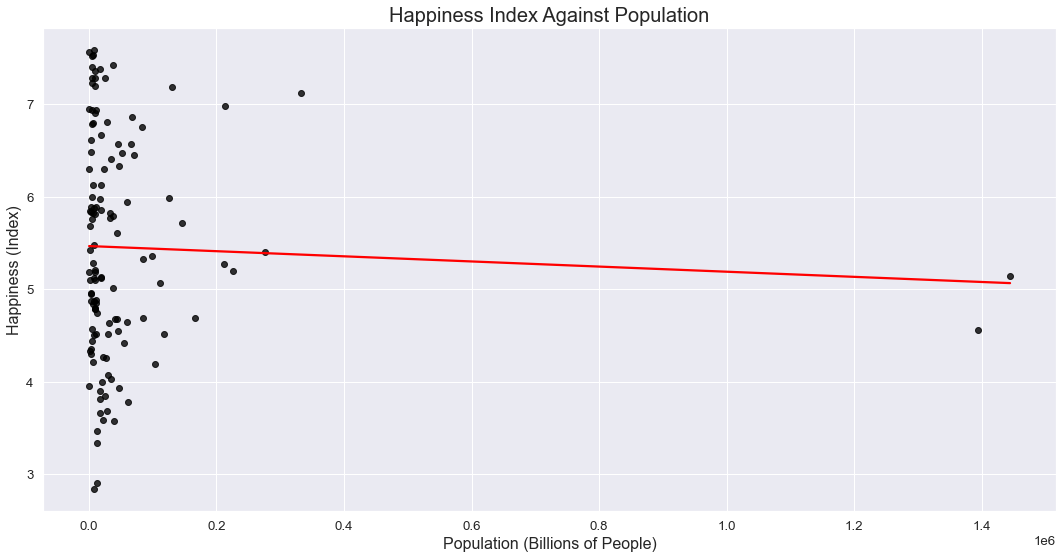

In [19]:
# Check population against happiness
plt.figure(figsize = (15, 8))
g = sns.regplot(data = gov, x = 'population', y = 'happiness_index', scatter_kws = {'color': 'black'},
            line_kws = {'color': 'red'}, ci = None)

plt.title('Happiness Index Against Population', size = 20)
plt.xlabel('Population (Billions of People)', size = 16)
plt.ylabel('Happiness (Index)', size = 16)

plt.tight_layout();

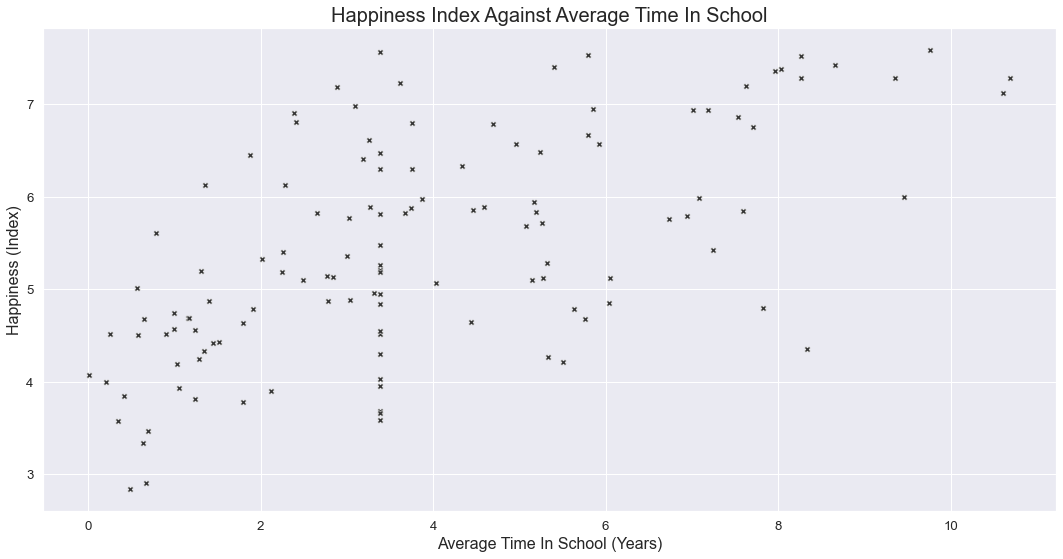

In [20]:
# Check average years in school against less corruption
plt.figure(figsize = (15, 8))
g = sns.scatterplot(data = gov, x = 'average_years_of_school', y = 'happiness_index', color = '.2', marker = 'X')

plt.title('Happiness Index Against Average Time In School', size = 20)
plt.xlabel('Average Time In School (Years)', size = 16)
plt.ylabel('Happiness (Index)', size = 16)

plt.tight_layout();

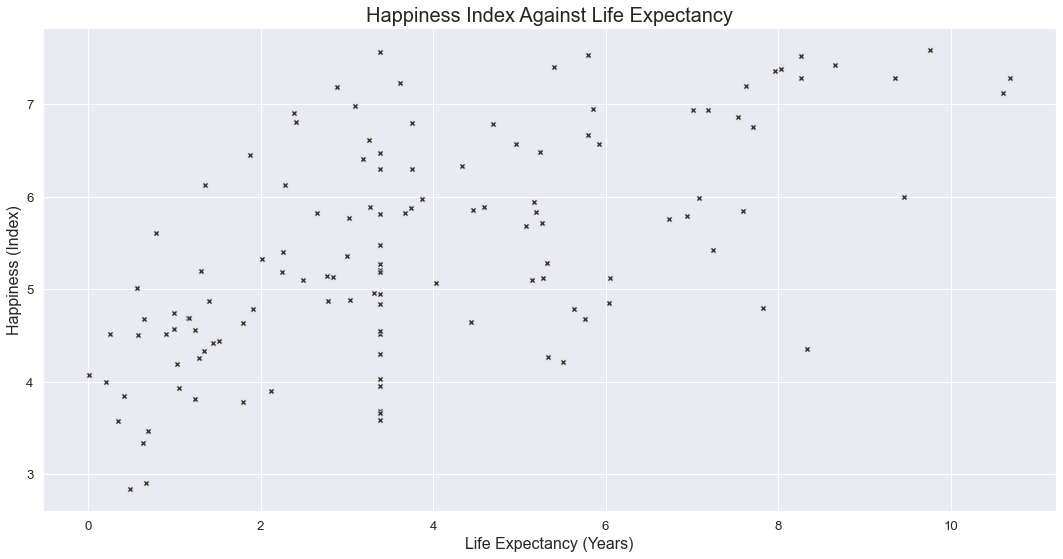

In [21]:
# Check life expectancy against happiness
plt.figure(figsize = (15, 8))
g = sns.scatterplot(data = gov, x = 'average_years_of_school', y = 'happiness_index', color = '.2', marker = 'X')

plt.title('Happiness Index Against Life Expectancy', size = 20)
plt.xlabel('Life Expectancy (Years)', size = 16)
plt.ylabel('Happiness (Index)', size = 16)

plt.tight_layout();

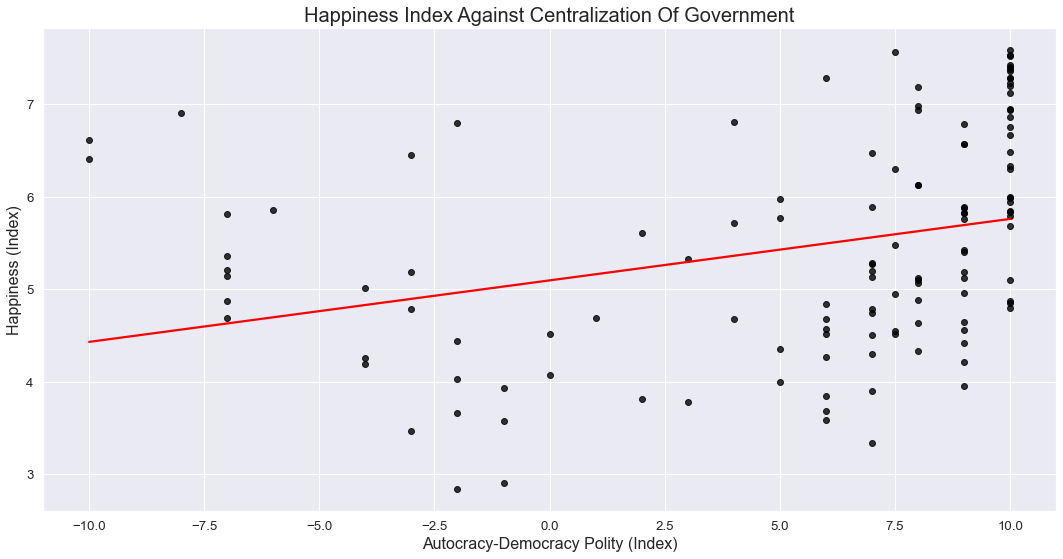

In [22]:
# Check centralization of government against happiness
plt.figure(figsize = (15, 8))
sns.regplot(data = gov, x = 'auto_demo_polity', y = 'happiness_index', scatter_kws = {'color': 'black'},
            line_kws = {'color': 'red'}, ci = None)

plt.title('Happiness Index Against Centralization Of Government', size = 20)
plt.xlabel('Autocracy-Democracy Polity (Index)', size = 16)
plt.ylabel('Happiness (Index)', size = 16)

plt.tight_layout();

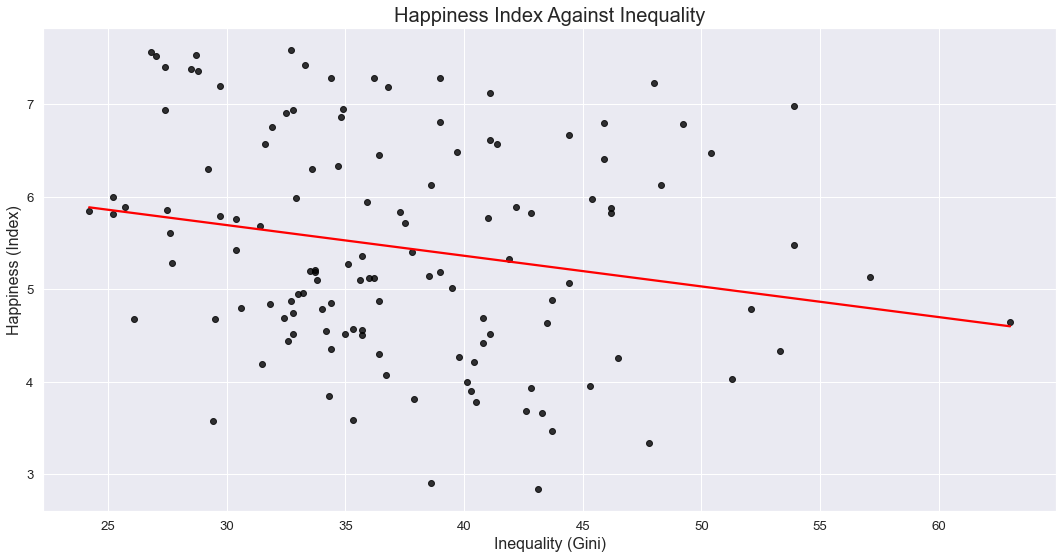

In [23]:
# Check inequality against happiness
plt.figure(figsize = (15, 8))
sns.regplot(data = gov, x = 'inequality_gini', y = 'happiness_index', scatter_kws = {'color': 'black'},
            line_kws = {'color': 'red'}, ci = None)

plt.title('Happiness Index Against Inequality', size = 20)
plt.xlabel('Inequality (Gini)', size = 16)
plt.ylabel('Happiness (Index)', size = 16)

plt.tight_layout();

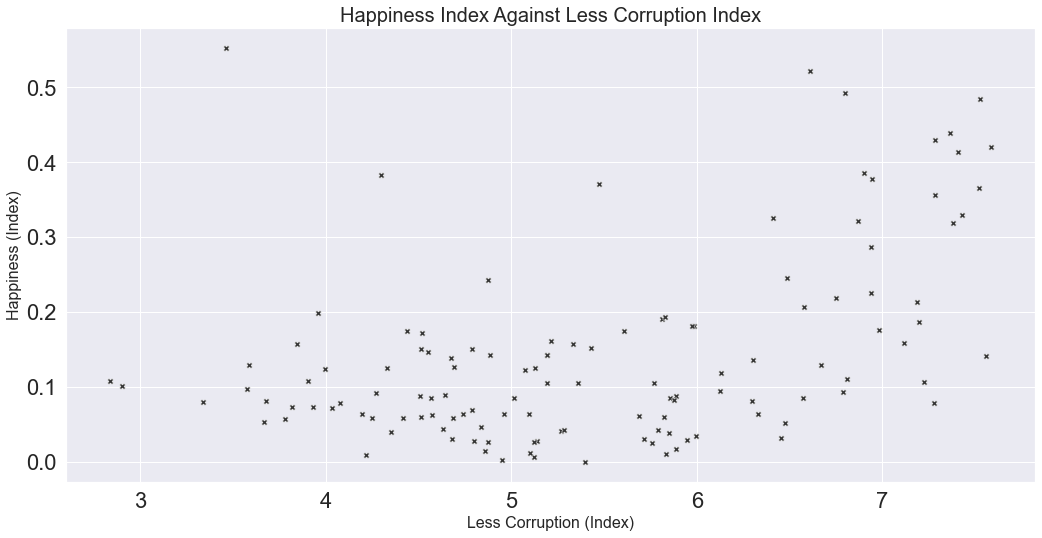

In [36]:
# Check corruption against happiness
plt.figure(figsize = (15, 8))
g = sns.scatterplot(data = gov, x = 'happiness_index', y = 'less_corruption_index', color = '.2', marker = 'X')

plt.title('Happiness Index Against Less Corruption Index', size = 20)
plt.xlabel('Less Corruption (Index)', size = 16)
plt.ylabel('Happiness (Index)', size = 16)

plt.tight_layout();

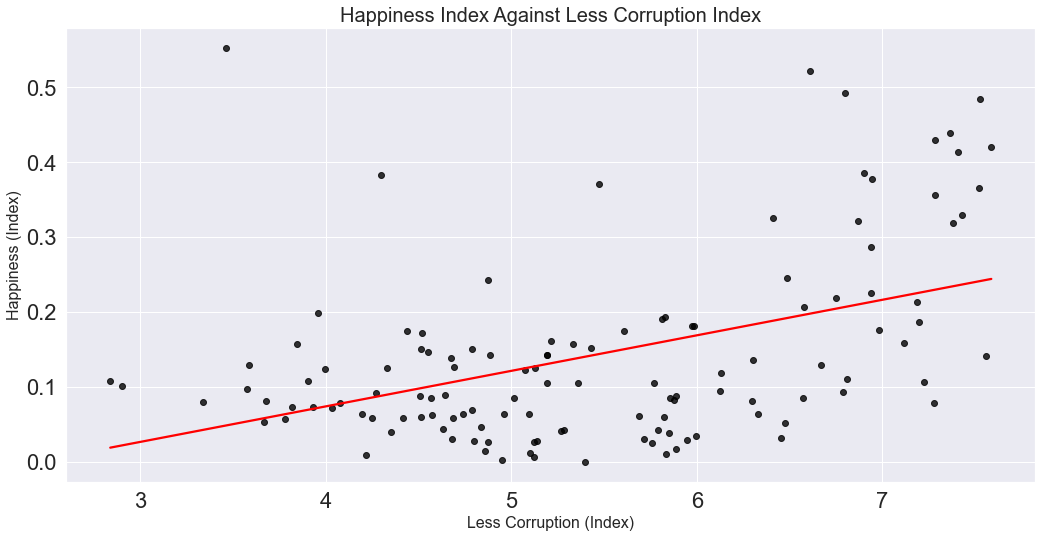

In [37]:
# Check corruption against happiness
plt.figure(figsize = (15, 8))
sns.regplot(data = gov, x = 'happiness_index', y = 'less_corruption_index', scatter_kws = {'color': 'black'},
            line_kws = {'color': 'red'}, ci = None)

plt.title('Happiness Index Against Less Corruption Index', size = 20)
plt.xlabel('Less Corruption (Index)', size = 16)
plt.ylabel('Happiness (Index)', size = 16)

plt.tight_layout();

In [25]:
gov.sort_values(by = 'auto_demo_polity', ascending = True).head(10)

,country,population,area_square_km,density_square_km,average_years_of_school,auto_demo_polity,gdp_per_capita,happiness_index,freedom_index,less_corruption_index,life_expectancy_years,inequality_gini,median_household_income_dollars,median_per_capita_income_dollars,median_individual_income_dollars
113,Qatar,2930.528,11586,252.9370,3.26,-10.0,98941.2030,6.611,0.64040,0.52208,79.758,41.1,26555.0,5117.0,11480.0
37,Saudi Arabia,35340.683,2149690,16.4399,3.19,-10.0,41863.2110,6.411,0.31048,0.32524,74.651,45.9,24980.0,4762.0,22850.0
77,United Arab Emirates,9991.089,83600,119.5106,2.39,-8.0,67469.6480,6.901,0.64157,0.38583,77.285,32.5,7437.5,1790.5,43470.0
0,China,1444216.107,9706961,148.7815,2.77,-7.0,12009.4430,5.140,0.51697,0.02781,75.928,38.5,6180.0,1786.0,10410.0
16,Iran,85028.759,1648195,51.5890,1.17,-7.0,14834.1780,4.686,0.30033,0.05863,75.796,40.8,12046.0,3115.0,5420.0
88,Laos,7379.358,236800,31.1628,1.40,-7.0,5854.8647,4.876,0.59591,0.24249,66.546,36.4,3379.0,615.0,2570.0
14,Vietnam,98168.833,331212,296.3927,3.00,-7.0,5462.5864,5.360,0.59444,0.10441,75.110,35.7,4783.0,1124.0,2540.0
80,Belarus,9442.862,207600,45.4858,3.38,-7.0,16681.6520,5.813,0.37938,0.19090,73.652,25.2,15085.0,5236.0,6280.0
73,Azerbaijan,10223.342,86600,118.0524,3.38,-7.0,14372.9700,5.212,0.37030,0.16065,72.266,33.7,11446.0,2430.0,11480.0
55,Kazakhstan,18994.962,2724900,6.9709,4.46,-6.0,21445.6930,5.855,0.51649,0.08454,71.319,27.5,7492.0,1958.0,11480.0


In [26]:
gov_no_oil = gov[gov['auto_demo_polity'] > -8] #most of the strongest autocracies are oil countries which could skew findings as few countries have that many resources
gov_no_oil.head()

,country,population,area_square_km,density_square_km,average_years_of_school,auto_demo_polity,gdp_per_capita,happiness_index,freedom_index,less_corruption_index,life_expectancy_years,inequality_gini,median_household_income_dollars,median_per_capita_income_dollars,median_individual_income_dollars
0,China,1444216.107,9706961,148.7815,2.77,-7.0,12009.4430,5.140,0.51697,0.02781,75.928,38.5,6180.0,1786.0,10410.0
1,India,1393409.038,3287590,423.8391,1.24,9.0,5722.5186,4.565,0.39786,0.08492,68.607,35.7,3168.0,616.0,2130.0
2,United States,332915.073,9372610,35.5200,10.61,10.0,53533.2810,7.119,0.54604,0.15890,78.910,41.1,43585.0,15480.0,65760.0
3,Indonesia,276361.783,1904569,145.1046,2.26,9.0,9781.2070,5.399,0.46611,0.00000,70.768,37.8,2199.0,541.0,4050.0
4,Pakistan,225199.937,881912,255.3542,1.31,7.0,4815.9243,5.194,0.12102,0.10464,66.577,33.5,4060.0,480.0,1530.0


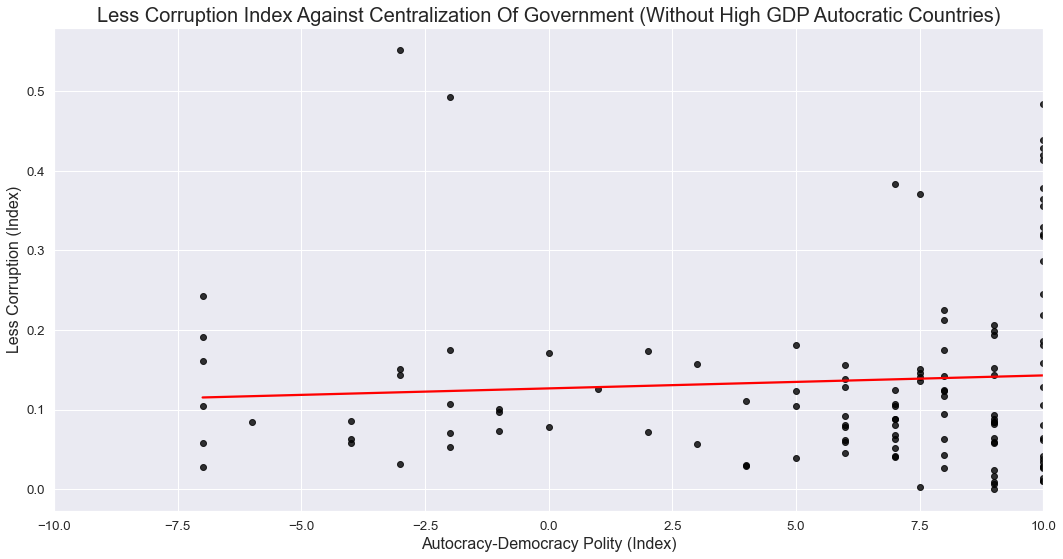

In [27]:
# Check centralization of government against happiness
plt.figure(figsize = (15, 8))
sns.regplot(data = gov_no_oil, x = 'auto_demo_polity', y = 'less_corruption_index', scatter_kws = {'color': 'black'},
            line_kws = {'color': 'red'}, ci = None)

plt.title('Less Corruption Index Against Centralization Of Government (Without High GDP Autocratic Countries)', size = 20)
plt.xlabel('Autocracy-Democracy Polity (Index)', size = 16)
plt.ylabel('Less Corruption (Index)', size = 16)
plt.xlim(-10, 10)

plt.tight_layout();

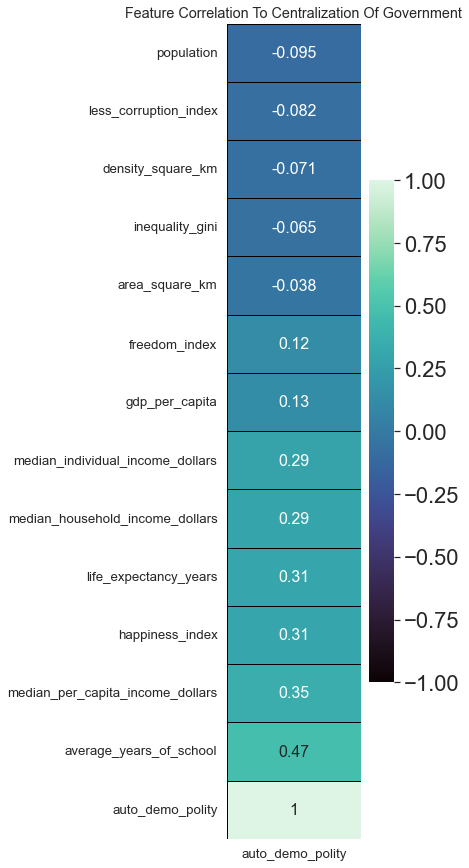

In [28]:
plt.figure(figsize = (3, 15))
ax = plt.axes()
ax.set_title('Feature Correlation To Centralization Of Government')
corr = gov.corr()[['auto_demo_polity']]
sns.set(font_scale = 2)
sns.heatmap(corr.sort_values(by = 'auto_demo_polity', ascending = True), 
            annot = True, cmap = 'mako', vmin = -1, vmax = 1, linecolor = 'black', 
            linewidth = 1, annot_kws = {'fontsize' : 16});

In [29]:
# Finally, look for values for Switzerland as a case study
gov[gov['country'] == 'Switzerland']

,country,population,area_square_km,density_square_km,average_years_of_school,auto_demo_polity,gdp_per_capita,happiness_index,freedom_index,less_corruption_index,life_expectancy_years,inequality_gini,median_household_income_dollars,median_per_capita_income_dollars,median_individual_income_dollars
83,Switzerland,8715.494,41284,211.1107,9.76,10.0,62835.66,7.587,0.66557,0.41978,83.142,32.7,7437.5,1790.5,85500.0
